In [50]:
import sys 
sys.path.append("../")

In [51]:
import pandas as pd
import plotly.graph_objects as go
from technicals.indicators import RSI
from technicals.patterns import apply_patterns
from plotting import CandlePlot
from dateutil import parser
import datetime as dt

In [52]:
df_raw = pd.read_pickle("../data/EUR_USD_H1.pkl")

In [53]:
df_raw.shape

(37219, 14)

In [54]:
# df_an = df_raw.iloc[-6000:].copy() 
df_an = df_raw.copy() 
df_an.reset_index(drop=True,inplace=True)

In [55]:
df_an.shape

(37219, 14)

In [56]:
df_an = RSI(df_an)

In [57]:
df_an.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,RSI_14
37214,2021-12-30 19:00:00+00:00,1063,1.13058,1.13298,1.13043,1.13274,1.13052,1.13291,1.13036,1.13267,1.13065,1.13306,1.13049,1.13280,51.407635
37215,2021-12-30 20:00:00+00:00,1092,1.13272,1.13304,1.13185,1.13193,1.13264,1.13297,1.13177,1.13186,1.13279,1.13311,1.13192,1.13200,48.671929
37216,2021-12-30 21:00:00+00:00,388,1.13195,1.13276,1.13194,1.13258,1.13188,1.13269,1.13187,1.13249,1.13202,1.13283,1.13201,1.13267,50.928675
37217,2021-12-30 22:00:00+00:00,118,1.13252,1.13264,1.13222,1.13230,1.13204,1.13236,1.13182,1.13218,1.13299,1.13299,1.13236,1.13243,49.910668
37218,2021-12-30 23:00:00+00:00,507,1.13227,1.13258,1.13190,1.13224,1.13214,1.13251,1.13183,1.13216,1.13240,1.13266,1.13198,1.13231,49.681497


In [58]:
df_an.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,RSI_14
0,2016-01-07 00:00:00+00:00,542,1.07764,1.07832,1.07744,1.07778,1.07757,1.07823,1.07735,1.07770,1.07772,1.07840,1.07752,1.07787,NaN
1,2016-01-07 01:00:00+00:00,3167,1.07776,1.08100,1.07748,1.08029,1.07768,1.08092,1.07740,1.08020,1.07784,1.08109,1.07756,1.08038,NaN
2,2016-01-07 02:00:00+00:00,1567,1.08026,1.08176,1.07996,1.08152,1.08018,1.08169,1.07987,1.08144,1.08035,1.08184,1.08005,1.08159,NaN
3,2016-01-07 03:00:00+00:00,914,1.08156,1.08257,1.08150,1.08187,1.08147,1.08249,1.08142,1.08178,1.08164,1.08265,1.08157,1.08196,NaN
4,2016-01-07 04:00:00+00:00,649,1.08190,1.08256,1.08156,1.08236,1.08182,1.08247,1.08147,1.08228,1.08199,1.08264,1.08163,1.08245,NaN


In [59]:
df_an = apply_patterns(df_an)

In [60]:
df_an['EMA_200'] = df_an.mid_c.ewm(span=200, min_periods=200).mean()

In [61]:
df_an.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'RSI_14',
       'body_lower', 'body_upper', 'body_bottom_perc', 'body_top_perc',
       'body_perc', 'direction', 'body_size', 'low_change', 'high_change',
       'body_size_change', 'mid_point', 'mid_point_prev_2', 'body_size_prev',
       'direction_prev', 'direction_prev_2', 'body_perc_prev',
       'body_perc_prev_2', 'HANGING_MAN', 'SHOOTING_STAR', 'SPINNING_TOP',
       'MARUBOZU', 'ENGULFING', 'TWEEZER_TOP', 'TWEEZER_BOTTOM',
       'MORNING_STAR', 'EVENING_STAR', 'EMA_200'],
      dtype='object')

In [62]:
our_cols = ['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'ENGULFING', 'direction', 'EMA_200', 'RSI_14']

In [63]:
df_slim = df_an[our_cols].copy()
df_slim.dropna(inplace=True)
df_slim.reset_index(drop=True, inplace=True)

In [64]:
df_slim.head()

,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,ENGULFING,direction,EMA_200,RSI_14
0,2016-01-19 07:00:00+00:00,1.08736,1.08764,1.08595,1.08652,1.08726,1.08756,1.08587,1.08645,1.08745,1.08772,1.08603,1.08660,False,-1,1.088334,36.239350
1,2016-01-19 08:00:00+00:00,1.08654,1.08846,1.08636,1.08846,1.08647,1.08832,1.08629,1.08832,1.08662,1.08861,1.08644,1.08861,True,1,1.088336,47.615598
2,2016-01-19 09:00:00+00:00,1.08844,1.08890,1.08702,1.08724,1.08834,1.08883,1.08694,1.08699,1.08854,1.08898,1.08710,1.08749,False,-1,1.088323,42.482293
3,2016-01-19 10:00:00+00:00,1.08728,1.08834,1.08662,1.08730,1.08702,1.08827,1.08655,1.08722,1.08755,1.08842,1.08668,1.08737,False,1,1.088312,42.808846
4,2016-01-19 11:00:00+00:00,1.08728,1.08732,1.08599,1.08630,1.08721,1.08726,1.08593,1.08623,1.08734,1.08738,1.08605,1.08637,True,-1,1.088289,38.849941


In [65]:
BUY = 1 
SELL = -1
NONE = 0
RSI_LIMIT = 50.0

def apply_signal(row):
    if row.ENGULFING == True:
        if row.direction  == BUY and row.mid_l > row.EMA_200:
            if row.RSI_14 > RSI_LIMIT: 
                return BUY
        if row.direction  == SELL and row.mid_h > row.EMA_200:
            if row.RSI_14 < RSI_LIMIT: 
                return SELL
    return NONE

In [66]:
df_slim["SIGNAL"] = df_slim.apply(apply_signal, axis=1)

In [67]:
df_slim["SIGNAL"].value_counts()

SIGNAL
 0    34357
 1     1606
-1     1057
Name: count, dtype: int64

In [68]:
LOSS_FACTOR = -1.0
PROFIT_FACTOR = 1.5

def apply_take_profit(row):
    if row.SIGNAL != NONE:
        if row.SIGNAL == BUY:
            return (row.ask_c - row.ask_o) * PROFIT_FACTOR + row.ask_c
        else:
            return (row.bid_c - row.bid_o) * PROFIT_FACTOR + row.bid_c 
    else:
        return 0.0

def apply_stop_loss(row):
    if row.SIGNAL != NONE:
        if row.SIGNAL == BUY:
            return row.ask_o
        else:
            return row.bid_o 
    else:
        return 0.0

In [69]:
df_slim["TP"] = df_slim.apply(apply_take_profit, axis=1)
df_slim["SL"] = df_slim.apply(apply_stop_loss, axis=1)

In [70]:
df_slim[df_slim.SIGNAL == BUY].head()

,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,ENGULFING,direction,EMA_200,RSI_14,SIGNAL,TP,SL
15,2016-01-19 22:00:00+00:00,1.09060,1.09143,1.09052,1.09140,1.09010,1.09130,1.09010,1.09127,1.09110,1.09156,1.09063,1.09153,True,1,1.088541,57.545307,1,1.092175,1.09110
17,2016-01-20 00:00:00+00:00,1.09112,1.09246,1.09100,1.09214,1.09104,1.09239,1.09091,1.09206,1.09120,1.09255,1.09108,1.09223,True,1,1.088610,59.970073,1,1.093775,1.09120
23,2016-01-20 06:00:00+00:00,1.09491,1.09635,1.09491,1.09546,1.09484,1.09628,1.09484,1.09538,1.09498,1.09643,1.09498,1.09554,True,1,1.088985,68.866726,1,1.096380,1.09498
25,2016-01-20 08:00:00+00:00,1.09398,1.09760,1.09397,1.09625,1.09390,1.09754,1.09390,1.09619,1.09405,1.09768,1.09403,1.09631,True,1,1.089121,67.087323,1,1.099700,1.09405
146,2016-01-27 09:00:00+00:00,1.08673,1.08764,1.08665,1.08726,1.08666,1.08756,1.08658,1.08719,1.08680,1.08771,1.08672,1.08732,True,1,1.085983,60.955020,1,1.088100,1.08680


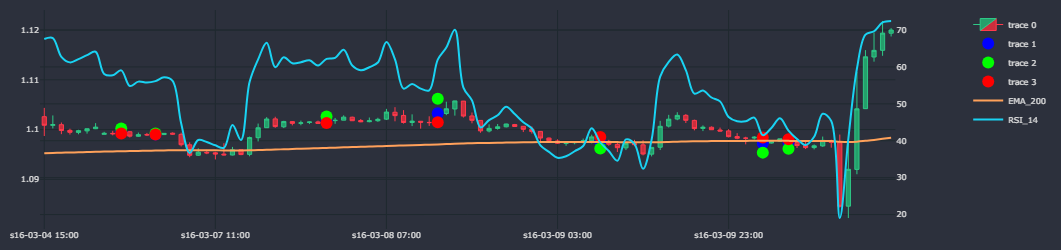

In [71]:
df_plot = df_slim.iloc[800:900]
cp = CandlePlot(df_plot, candles=True)

trades = cp.df_plot[cp.df_plot.SIGNAL != NONE]

markers = ['mid_c', 'TP', 'SL']

marker_colors = ['#0000FF', '#00FF00', '#FF0000']

for i in range(3):
    cp.fig.add_trace(go.Scatter(
        x = trades.sTime,
        y = trades[markers[i]], 
        mode = 'markers',
        marker = dict(color = marker_colors[i], size = 12)
    ))

cp.show_plot(line_traces=["EMA_200"], sec_traces=['RSI_14'],height=250)

In [72]:
class Trade:
    def __init__(self, row):
        self.running = True
        self.start_index = row.name

        if row.SIGNAL == BUY:
            
            self.start_price = row.ask_c
            self.trigger_price = row.ask_c
        else:
            self.start_price = row.bid_c
            self.trigger_price = row.bid_c
            
        self.SIGNAL = row.SIGNAL
        self.TP = row.TP
        self.SL = row.SL
        self.result = 0.0
        self.end_time = row.time
        self.start_time = row.time
        self.duration = 0

    
    def close_trade(self, row, result, trigger_price):
        self.running = False
        self.result = result
        self.end_time = row.time
        self.trigger_price = trigger_price
        
    def update(self,row):
        self.duration += 1
        if self.SIGNAL == BUY:
            if row.bid_h >= self.TP:
                self.close_trade(row, PROFIT_FACTOR, row.bid_h)
            elif row.bid_l <= self.SL:
                self.close_trade(row, LOSS_FACTOR, row.bid_l)
        if self.SIGNAL == SELL:
            if row.ask_l <= self.TP:
                self.close_trade(row, PROFIT_FACTOR, row.ask_l)
            elif row.ask_h <= self.SL:
                self.close_trade(row, LOSS_FACTOR, row.ask_h)
        
    

In [73]:
open_trades = []
closed_trades = []

for index, row in df_slim.iterrows():
    for ot in open_trades:
        ot.update(row)
        if ot.running == False:
            closed_trades.append(ot)
    open_trades = [x for x in open_trades if x.running == True]

    if row.SIGNAL != NONE:
        open_trades.append(Trade(row)) 



In [74]:
df_results = pd.DataFrame.from_dict([vars(x) for x in closed_trades])
df_results

,running,start_index,start_price,trigger_price,SIGNAL,TP,SL,result,end_time,start_time,duration
0,False,15,1.09153,1.09045,1,1.092175,1.09110,-1.0,2016-01-19 23:00:00+00:00,2016-01-19 22:00:00+00:00,1
1,False,17,1.09223,1.09513,1,1.093775,1.09120,1.5,2016-01-20 03:00:00+00:00,2016-01-20 00:00:00+00:00,3
2,False,23,1.09554,1.09367,1,1.096380,1.09498,-1.0,2016-01-20 07:00:00+00:00,2016-01-20 06:00:00+00:00,1
3,False,25,1.09631,1.09161,1,1.099700,1.09405,-1.0,2016-01-20 09:00:00+00:00,2016-01-20 08:00:00+00:00,1
4,False,28,1.09085,1.09188,-1,1.088285,1.09256,-1.0,2016-01-20 12:00:00+00:00,2016-01-20 11:00:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...
2657,False,36949,1.13192,1.13277,-1,1.130255,1.13303,-1.0,2021-12-28 02:00:00+00:00,2021-12-28 01:00:00+00:00,1
2658,False,36959,1.13335,1.13260,1,1.133650,1.13315,-1.0,2021-12-28 12:00:00+00:00,2021-12-28 11:00:00+00:00,1
2659,False,36995,1.13605,1.13480,1,1.137610,1.13501,-1.0,2021-12-30 00:00:00+00:00,2021-12-29 23:00:00+00:00,1
2660,False,37004,1.13012,1.13083,-1,1.127750,1.13170,-1.0,2021-12-30 09:00:00+00:00,2021-12-30 08:00:00+00:00,1


In [75]:
df_results.result.sum()

-224.5

In [76]:
df_results.sort_values(by="start_index", inplace = True)

In [77]:
df_m5 = pd.read_pickle("../data/EUR_USD_M5.pkl")

In [78]:
df_m5.shape

(445038, 14)

In [79]:
df_m5.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [80]:
time_min = parser.parse("2021-12-15T10:00:00Z")
time_max = parser.parse("2021-12-15T11:00:00Z")
df_m5_s = df_m5[(df_m5.time>=time_min)&(df_m5.time<=time_max)]
df_raw_s = df_raw[(df_raw.time>=time_min)&(df_raw.time<=time_max)]

In [81]:
df_m5_s

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
441719,2021-12-15 10:00:00+00:00,208,1.12716,1.12745,1.12709,1.12734,1.12708,1.12738,1.12702,1.12727,1.12723,1.12752,1.12715,1.12742
441720,2021-12-15 10:05:00+00:00,132,1.12733,1.12754,1.12726,1.12746,1.12726,1.12747,1.12719,1.12739,1.12740,1.12760,1.12733,1.12752
441721,2021-12-15 10:10:00+00:00,166,1.12744,1.12752,1.12732,1.12746,1.12737,1.12745,1.12725,1.12739,1.12750,1.12760,1.12739,1.12753
441722,2021-12-15 10:15:00+00:00,138,1.12744,1.12770,1.12740,1.12761,1.12737,1.12763,1.12733,1.12754,1.12752,1.12776,1.12747,1.12768
441723,2021-12-15 10:20:00+00:00,252,1.12760,1.12762,1.12712,1.12712,1.12753,1.12756,1.12705,1.12705,1.12767,1.12769,1.12719,1.12719
441724,2021-12-15 10:25:00+00:00,198,1.12711,1.12726,1.12695,1.12695,1.12704,1.12719,1.12688,1.12688,1.12718,1.12733,1.12702,1.12702
441725,2021-12-15 10:30:00+00:00,142,1.12696,1.12698,1.12680,1.12696,1.12689,1.12691,1.12674,1.12690,1.12703,1.12706,1.12686,1.12703
441726,2021-12-15 10:35:00+00:00,121,1.12698,1.12712,1.12698,1.12700,1.12691,1.12705,1.12691,1.12693,1.12704,1.12718,1.12704,1.12706
441727,2021-12-15 10:40:00+00:00,206,1.12698,1.12707,1.12651,1.12656,1.12692,1.12700,1.12644,1.12649,1.12705,1.12714,1.12658,1.12663
441728,2021-12-15 10:45:00+00:00,165,1.12655,1.12668,1.12645,1.12654,1.12648,1.12661,1.12638,1.12648,1.12662,1.12675,1.12652,1.12661


In [82]:
df_raw_s

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
36941,2021-12-15 10:00:00+00:00,2038,1.12716,1.1277,1.12634,1.12673,1.12708,1.12763,1.12627,1.12666,1.12723,1.12776,1.12640,1.12680
36942,2021-12-15 11:00:00+00:00,2138,1.12674,1.1270,1.12626,1.12698,1.12667,1.12693,1.12619,1.12691,1.12681,1.12706,1.12631,1.12705


In [83]:
df_m5_slim = df_m5[['time','mid_h', 'mid_l']].copy()

In [84]:
df_m5_slim

,time,mid_h,mid_l
0,2016-01-07 00:00:00+00:00,1.07811,1.07759
1,2016-01-07 00:05:00+00:00,1.07818,1.07764
2,2016-01-07 00:10:00+00:00,1.07832,1.07812
3,2016-01-07 00:15:00+00:00,1.07830,1.07798
4,2016-01-07 00:20:00+00:00,1.07799,1.07776
...,...,...,...
445033,2021-12-30 23:35:00+00:00,1.13224,1.13190
445034,2021-12-30 23:40:00+00:00,1.13206,1.13196
445035,2021-12-30 23:45:00+00:00,1.13227,1.13196
445036,2021-12-30 23:50:00+00:00,1.13240,1.13228


In [85]:
df_signals = df_slim[df_slim.SIGNAL != NONE].copy()
df_signals['m5_start'] = [x + dt.timedelta(hours=1) for x in df_signals.time]
df_signals['start_index_h1'] = df_signals.index
df_signals.head()

,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,...,ask_c,ENGULFING,direction,EMA_200,RSI_14,SIGNAL,TP,SL,m5_start,start_index_h1
15,2016-01-19 22:00:00+00:00,1.09060,1.09143,1.09052,1.09140,1.09010,1.09130,1.09010,1.09127,1.09110,...,1.09153,True,1,1.088541,57.545307,1,1.092175,1.09110,2016-01-19 23:00:00+00:00,15
17,2016-01-20 00:00:00+00:00,1.09112,1.09246,1.09100,1.09214,1.09104,1.09239,1.09091,1.09206,1.09120,...,1.09223,True,1,1.088610,59.970073,1,1.093775,1.09120,2016-01-20 01:00:00+00:00,17
23,2016-01-20 06:00:00+00:00,1.09491,1.09635,1.09491,1.09546,1.09484,1.09628,1.09484,1.09538,1.09498,...,1.09554,True,1,1.088985,68.866726,1,1.096380,1.09498,2016-01-20 07:00:00+00:00,23
25,2016-01-20 08:00:00+00:00,1.09398,1.09760,1.09397,1.09625,1.09390,1.09754,1.09390,1.09619,1.09405,...,1.09631,True,1,1.089121,67.087323,1,1.099700,1.09405,2016-01-20 09:00:00+00:00,25
28,2016-01-20 11:00:00+00:00,1.09263,1.09274,1.09038,1.09092,1.09256,1.09267,1.09029,1.09085,1.09270,...,1.09099,True,-1,1.089214,46.112852,-1,1.088285,1.09256,2016-01-20 12:00:00+00:00,28


In [86]:
df_signals.columns

Index(['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h', 'bid_l',
       'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'ENGULFING', 'direction',
       'EMA_200', 'RSI_14', 'SIGNAL', 'TP', 'SL', 'm5_start',
       'start_index_h1'],
      dtype='object')

In [87]:
df_signals.drop(['time', 'mid_o', 'mid_h', 'mid_l', 'ask_c', 'bid_c', 'ENGULFING', 'EMA_200', 'RSI_14', 'direction'], axis=1, inplace=True)

In [88]:
df_signals.head()

,mid_c,bid_o,bid_h,bid_l,ask_o,ask_h,ask_l,SIGNAL,TP,SL,m5_start,start_index_h1
15,1.09140,1.09010,1.09130,1.09010,1.09110,1.09156,1.09063,1,1.092175,1.09110,2016-01-19 23:00:00+00:00,15
17,1.09214,1.09104,1.09239,1.09091,1.09120,1.09255,1.09108,1,1.093775,1.09120,2016-01-20 01:00:00+00:00,17
23,1.09546,1.09484,1.09628,1.09484,1.09498,1.09643,1.09498,1,1.096380,1.09498,2016-01-20 07:00:00+00:00,23
25,1.09625,1.09390,1.09754,1.09390,1.09405,1.09768,1.09403,1,1.099700,1.09405,2016-01-20 09:00:00+00:00,25
28,1.09092,1.09256,1.09267,1.09029,1.09270,1.09281,1.09045,-1,1.088285,1.09256,2016-01-20 12:00:00+00:00,28


In [89]:
df_signals.rename(columns={ 
    'mid_c': 'start_price',
    'm5_start': 'time'
}, inplace = True)

In [90]:
df_signals.head()

,start_price,bid_o,bid_h,bid_l,ask_o,ask_h,ask_l,SIGNAL,TP,SL,time,start_index_h1
15,1.09140,1.09010,1.09130,1.09010,1.09110,1.09156,1.09063,1,1.092175,1.09110,2016-01-19 23:00:00+00:00,15
17,1.09214,1.09104,1.09239,1.09091,1.09120,1.09255,1.09108,1,1.093775,1.09120,2016-01-20 01:00:00+00:00,17
23,1.09546,1.09484,1.09628,1.09484,1.09498,1.09643,1.09498,1,1.096380,1.09498,2016-01-20 07:00:00+00:00,23
25,1.09625,1.09390,1.09754,1.09390,1.09405,1.09768,1.09403,1,1.099700,1.09405,2016-01-20 09:00:00+00:00,25
28,1.09092,1.09256,1.09267,1.09029,1.09270,1.09281,1.09045,-1,1.088285,1.09256,2016-01-20 12:00:00+00:00,28


In [91]:
merged = pd.merge(left=df_m5_slim, right = df_signals, on= 'time', how='left')

In [92]:
merged.fillna(0, inplace=True)
# merged[merged.SIGNAL.isna() == False].head()

In [93]:
merged.SIGNAL = merged.SIGNAL.astype(int)
merged.start_index_h1 = merged.start_index_h1.astype(int)
merged.head()

,time,mid_h,mid_l,start_price,bid_o,bid_h,bid_l,ask_o,ask_h,ask_l,SIGNAL,TP,SL,start_index_h1
0,2016-01-07 00:00:00+00:00,1.07811,1.07759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,2016-01-07 00:05:00+00:00,1.07818,1.07764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,2016-01-07 00:10:00+00:00,1.07832,1.07812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,2016-01-07 00:15:00+00:00,1.07830,1.07798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,2016-01-07 00:20:00+00:00,1.07799,1.07776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [94]:
class TradeM5:
    def __init__(self, row):
        self.running = True
        self.start_index_m5 = row.name
        self.start_index_h1 = row.start_index_h1
        self.start_price = row.start_price
        self.trigger_price = row.start_price
        self.SIGNAL = row.SIGNAL
        self.TP = row.TP
        self.SL = row.SL
        self.result = 0.0
        self.end_time = row.time
        self.start_time = row.time
        self.duration = 1

    
    def close_trade(self, row, result, trigger_price):
        self.running = False
        self.result = result
        self.end_time = row.time
        self.trigger_price = trigger_price
        
    def update(self,row):
        self.duration += 1
        if self.SIGNAL == BUY:
            if row.mid_h >= self.TP:
                self.close_trade(row, PROFIT_FACTOR, row.mid_h)
            elif row.mid_l <= self.SL:
                self.close_trade(row, LOSS_FACTOR, row.mid_l)
        if self.SIGNAL == SELL:
            if row.mid_l <= self.TP:
                self.close_trade(row, PROFIT_FACTOR, row.mid_l)
            elif row.mid_h <= self.SL:
                self.close_trade(row, LOSS_FACTOR, row.mid_h)
        

In [95]:
open_trades_m5 = []
closed_trades_m5 = []

for index, row in merged.iterrows():
    for ot in open_trades_m5:
        ot.update(row)
        if ot.running == False:
            closed_trades_m5.append(ot)
    open_trades_m5 = [x for x in open_trades_m5 if x.running == True]

    if row.SIGNAL != NONE:
        open_trades_m5.append(TradeM5(row)) 

In [96]:
df_res_m5 = pd.DataFrame.from_dict([vars(x) for x in closed_trades_m5])
df_res_m5.head()

,running,start_index_m5,start_index_h1,start_price,trigger_price,SIGNAL,TP,SL,result,end_time,start_time,duration
0,False,2577,15,1.09140,1.09108,1,1.092175,1.09110,-1.0,2016-01-19 23:05:00+00:00,2016-01-19 23:00:00+00:00,2
1,False,2601,17,1.09214,1.09412,1,1.093775,1.09120,1.5,2016-01-20 03:00:00+00:00,2016-01-20 01:00:00+00:00,25
2,False,2673,23,1.09546,1.09494,1,1.096380,1.09498,-1.0,2016-01-20 07:20:00+00:00,2016-01-20 07:00:00+00:00,5
3,False,2697,25,1.09625,1.09370,1,1.099700,1.09405,-1.0,2016-01-20 09:20:00+00:00,2016-01-20 09:00:00+00:00,5
4,False,2733,28,1.09092,1.09112,-1,1.088285,1.09256,-1.0,2016-01-20 12:05:00+00:00,2016-01-20 12:00:00+00:00,2


In [97]:
df_res_m5.result.sum()

-1035.0